import important libraries 
and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =  pd.read_csv(r"D:\HP\datasets kaggle\Social Media Usage India.csv")
data.head()

Age       City        Current Status  \
0   24      Delhi  Working professional   
1   39      Delhi  Working professional   
2   22     Mumbai  Working professional   
3   26  Bengaluru            Sabbatical   
4   50      Delhi  Working professional   

  Do you own multiple profiles on Instagram?  Gender Highest Education  \
0                                         No  Female        Graduation   
1                                         No  Female   Post graduation   
2                                         No    Male        Graduation   
3                                        Yes  Female        Graduation   
4                                         No    Male        Graduation   

  Location (City Airport Code) Phone OS        State      Zone  ...  \
0                          DEL      iOs        Delhi  Northern  ...   
1                          DEL      iOs        Delhi  Northern  ...   
2                          BOM  Android  Maharashtra   Western  ...   
3                          BLR  Android    Karnataka  Southern  ...   
4                          DEL      iOs        Delhi  Northern  ...   

  Time Spent on Instagram in last week (in minutes)  \
0                                               770   
1                                                 0   
2                                             1,000   
3                                             2,000   
4                                                 0   

  Time Spent on Instagram in last weekend (in minutes)  \
0                                                400     
1                                                  0     
2                                              1,000     
3                                              2,000     
4                                                  0     

   Time Spent on WhatsApp in last week (in minutes)  \
0                                               900   
1                                             5,000   
2                                             7,000   
3                                             1,680   
4                                             2,400   

   Time Spent on WhatsApp in last weekend (in minutes) Total Facebook Usage  \
0                                                120                      0   
1                                              2,000                  8,160   
2                                              2,000                  2,500   
3                                              1,680                  3,000   
4                                              1,300                  3,000   

  Total Instagram Usage Total Social Media Usage Total Week Usage  \
0                 1,170                    2,190            1,670   
1                     0                   15,160           11,000   
2                 2,000                   13,500            8,500   
3                 4,000                   10,360            5,180   
4                     0                    6,700            3,900   

  Total Weekend Usage Total WhatsApp Usage  
0                 520                1,020  
1               4,160                7,000  
2               5,000                9,000  
3               5,180                3,360  
4               2,800                3,700  

[5 rows x 26 columns]

<h2> Analyse the data</h2>

-----------

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Age                                                                                                                   1628 non-null   int64  
 1   City                                                                                                                  1628 non-null   object 
 2   Current Status                                                                                                        1628 non-null   object 
 3   Do you own multiple profiles on Instagram?                                                                            1628 non-null   object 
 4   Gender

In [3]:
data.describe()

Age     Latitude    Longitude
count  1628.000000  1628.000000  1628.000000
mean     26.858108    22.759734    77.894131
std       8.851719     5.072753     5.261110
min      13.000000     8.485498    69.669281
25%      22.000000    18.987807    72.836447
50%      24.000000    22.562627    77.231495
75%      27.000000    28.651952    78.456355
max      74.000000    32.735686    94.912000

In [4]:
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [5]:
data.loc[0]

Age                                                                                                                                       24
City                                                                                                                                   Delhi
Current Status                                                                                                          Working professional
Do you own multiple profiles on Instagram?                                                                                                No
Gender                                                                                                                                Female
Highest Education                                                                                                                 Graduation
Location (City Airport Code)                                                                                                             DEL
Phone OS     

### Rename column's name 
-----
In the dataset of social media usage some columns name's are too much large. so, sort them

In [6]:
data.rename(columns={'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)':'Instagram Followers','How many posts do you have on Instagram?':'instagram post'},inplace=True)
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone', 'Instagram Followers', 'instagram post', 'Latitude',
       'Longitude', 'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

#### value count of some importantt feature's
---

In [7]:
list_column1 = ['Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education','Phone OS']
for i in list_column1:
       print(data[i].value_counts())

Working professional    796
Student                 637
Sabbatical              190
Self Employed             5
Name: Current Status, dtype: int64
No     1316
Yes     308
yes       4
Name: Do you own multiple profiles on Instagram?, dtype: int64
Male          813
Female        813
Non Binary      2
Name: Gender, dtype: int64
Graduation         950
Post graduation    541
High School        137
Name: Highest Education, dtype: int64
Android    1115
iOs         508
Others        5
Name: Phone OS, dtype: int64


### we found something wrong in data that is:
-----
1. In column 'Do you own multiple profiles on Instagram?' has three value count but two are similer that is "yes" and "Yes"
2. In column 'Gender' some thing un unsual that is "Non Binary"

In [8]:
#data.replace(to_replace="yes",value ="Yes",inplace=True)
data.loc[data['Do you own multiple profiles on Instagram?'] == 'yes','Do you own multiple profiles on Instagram?'] = "Yes"

In [9]:
for x in data.index:
    if data.loc[x,"Gender"] == "Non Binary":
        data.drop(x,inplace=True)

#### Change the type of columns
----


In [10]:
data.dtypes[data.dtypes == object]

City                                                    object
Current Status                                          object
Do you own multiple profiles on Instagram?              object
Gender                                                  object
Highest Education                                       object
Location (City Airport Code)                            object
Phone OS                                                object
State                                                   object
Zone                                                    object
Instagram Followers                                     object
instagram post                                          object
Time Spent on Facebook in last week (in minutes)        object
Time Spent on Facebook in last weekend (in minutes)     object
Time Spent on Instagram in last week (in minutes)       object
Time Spent on Instagram in last weekend (in minutes)    object
Time Spent on WhatsApp in last week (in minutes)       

In [11]:
list_columns = ['Instagram Followers', 'instagram post', 'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage']
for i in list_columns:
    data[i] = data[i].str.replace(",","")
    data[i] = pd.to_numeric(data[i])
data

Age       City        Current Status  \
0      24      Delhi  Working professional   
1      39      Delhi  Working professional   
2      22     Mumbai  Working professional   
3      26  Bengaluru            Sabbatical   
4      50      Delhi  Working professional   
...   ...        ...                   ...   
1622   24   Varanasi            Sabbatical   
1623   24      Delhi               Student   
1624   24    Kolkata  Working professional   
1625   24   Ludhiana  Working professional   
1626   35     Mumbai  Working professional   

     Do you own multiple profiles on Instagram?  Gender Highest Education  \
0                                            No  Female        Graduation   
1                                            No  Female   Post graduation   
2                                            No    Male        Graduation   
3                                           Yes  Female        Graduation   
4                                            No    Male        Graduation   
...                                         ...     ...               ...   
1622                                        Yes    Male   Post graduation   
1623                                        Yes    Male   Post graduation   
1624                                        Yes    Male   Post graduation   
1625                                        Yes    Male   Post graduation   
1626                                        Yes    Male   Post graduation   

     Location (City Airport Code) Phone OS          State      Zone  ...  \
0                             DEL      iOs          Delhi  Northern  ...   
1                             DEL      iOs          Delhi  Northern  ...   
2                             BOM  Android    Maharashtra   Western  ...   
3                             BLR  Android      Karnataka  Southern  ...   
4                             DEL      iOs          Delhi  Northern  ...   
...                           ...      ...            ...       ...  ...   
1622                          VNS      iOs  Uttar Pradesh  Northern  ...   
1623                          DEL      iOs          Delhi  Northern  ...   
1624                          CCU      iOs    West Bengal   Eastern  ...   
1625                          LUH      iOs         Punjab  Northern  ...   
1626                          BOM      iOs    Maharashtra   Western  ...   

      Time Spent on Instagram in last week (in minutes)  \
0                                                   770   
1                                                     0   
2                                                  1000   
3                                                  2000   
4                                                     0   
...                                                 ...   
1622                                                450   
1623                                                  0   
1624                                                217   
1625                                                272   
1626                                                 22   

      Time Spent on Instagram in last weekend (in minutes)  \
0                                                   400      
1                                                     0      
2                                                  1000      
3                                                  2000      
4                                                     0      
...                                                 ...      
1622                                                 85      
1623                                                  0      
1624                                                 92      
1625                                                 77      
1626                                                 34      

      Time Spent on WhatsApp in last week (in minutes)  \
0                                                  900   
1                                            

In [12]:
data.dtypes

Age                                                       int64
City                                                     object
Current Status                                           object
Do you own multiple profiles on Instagram?               object
Gender                                                   object
Highest Education                                        object
Location (City Airport Code)                             object
Phone OS                                                 object
State                                                    object
Zone                                                     object
Instagram Followers                                       int64
instagram post                                            int64
Latitude                                                float64
Longitude                                               float64
Time Spent on Facebook in last week (in minutes)          int64
Time Spent on Facebook in last weekend (

#### Corelation's of columns
---

<AxesSubplot:>

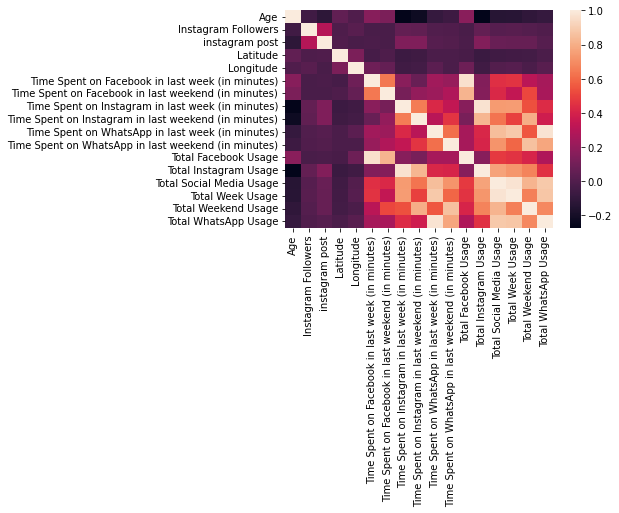

In [13]:

sns.heatmap(data.corr())

<function matplotlib.pyplot.show(close=None, block=None)>

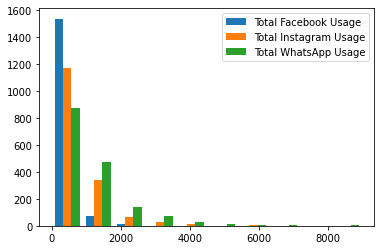

In [14]:
plt.hist([data['Total Facebook Usage'],data['Total Instagram Usage'],data['Total WhatsApp Usage']],label=['Total Facebook Usage', 'Total Instagram Usage','Total WhatsApp Usage'])
plt.legend(loc ="upper right")
plt.show

In [15]:
print(data.groupby('Gender')['Total Facebook Usage'].mean())
print("Total_Usage",data['Total Facebook Usage'].sum())

Gender
Female    239.571956
Male      262.656827
Name: Total Facebook Usage, dtype: float64
Total_Usage 408312


In [16]:
print(data.groupby('Gender')['Total WhatsApp Usage'].mean())
print("Total_Usage",data['Total WhatsApp Usage'].sum())

Gender
Female    1186.115621
Male      1113.046248
Name: Total WhatsApp Usage, dtype: float64
Total_Usage 1869218.6


In [17]:
print(data.groupby('Gender')['Total Instagram Usage'].mean())
print("Total_Usage",data['Total Instagram Usage'].sum())

Gender
Female    789.159902
Male      649.499385
Name: Total Instagram Usage, dtype: float64
Total_Usage 1169630


C:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for 

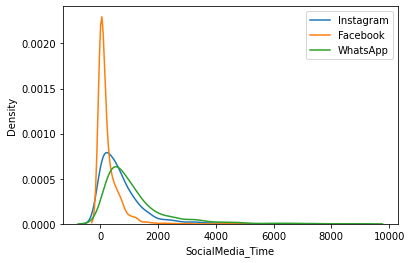

In [18]:
sns.distplot(data['Total Instagram Usage'],hist = False,label='Instagram')
sns.distplot(data['Total Facebook Usage'],hist = False,label='Facebook')
sns.distplot(data['Total WhatsApp Usage'],hist = False, axlabel='SocialMedia_Time',label='WhatsApp')
plt.legend(loc ="upper right")
plt.show()

In [19]:
data['Time Spent on Facebook in last weekend (in minutes)'].sum()

123107

In [20]:
data['Time Spent on Instagram in last weekend (in minutes)'].sum()

349543

In [21]:
data['Time Spent on WhatsApp in last weekend (in minutes)'].sum()

479248.6

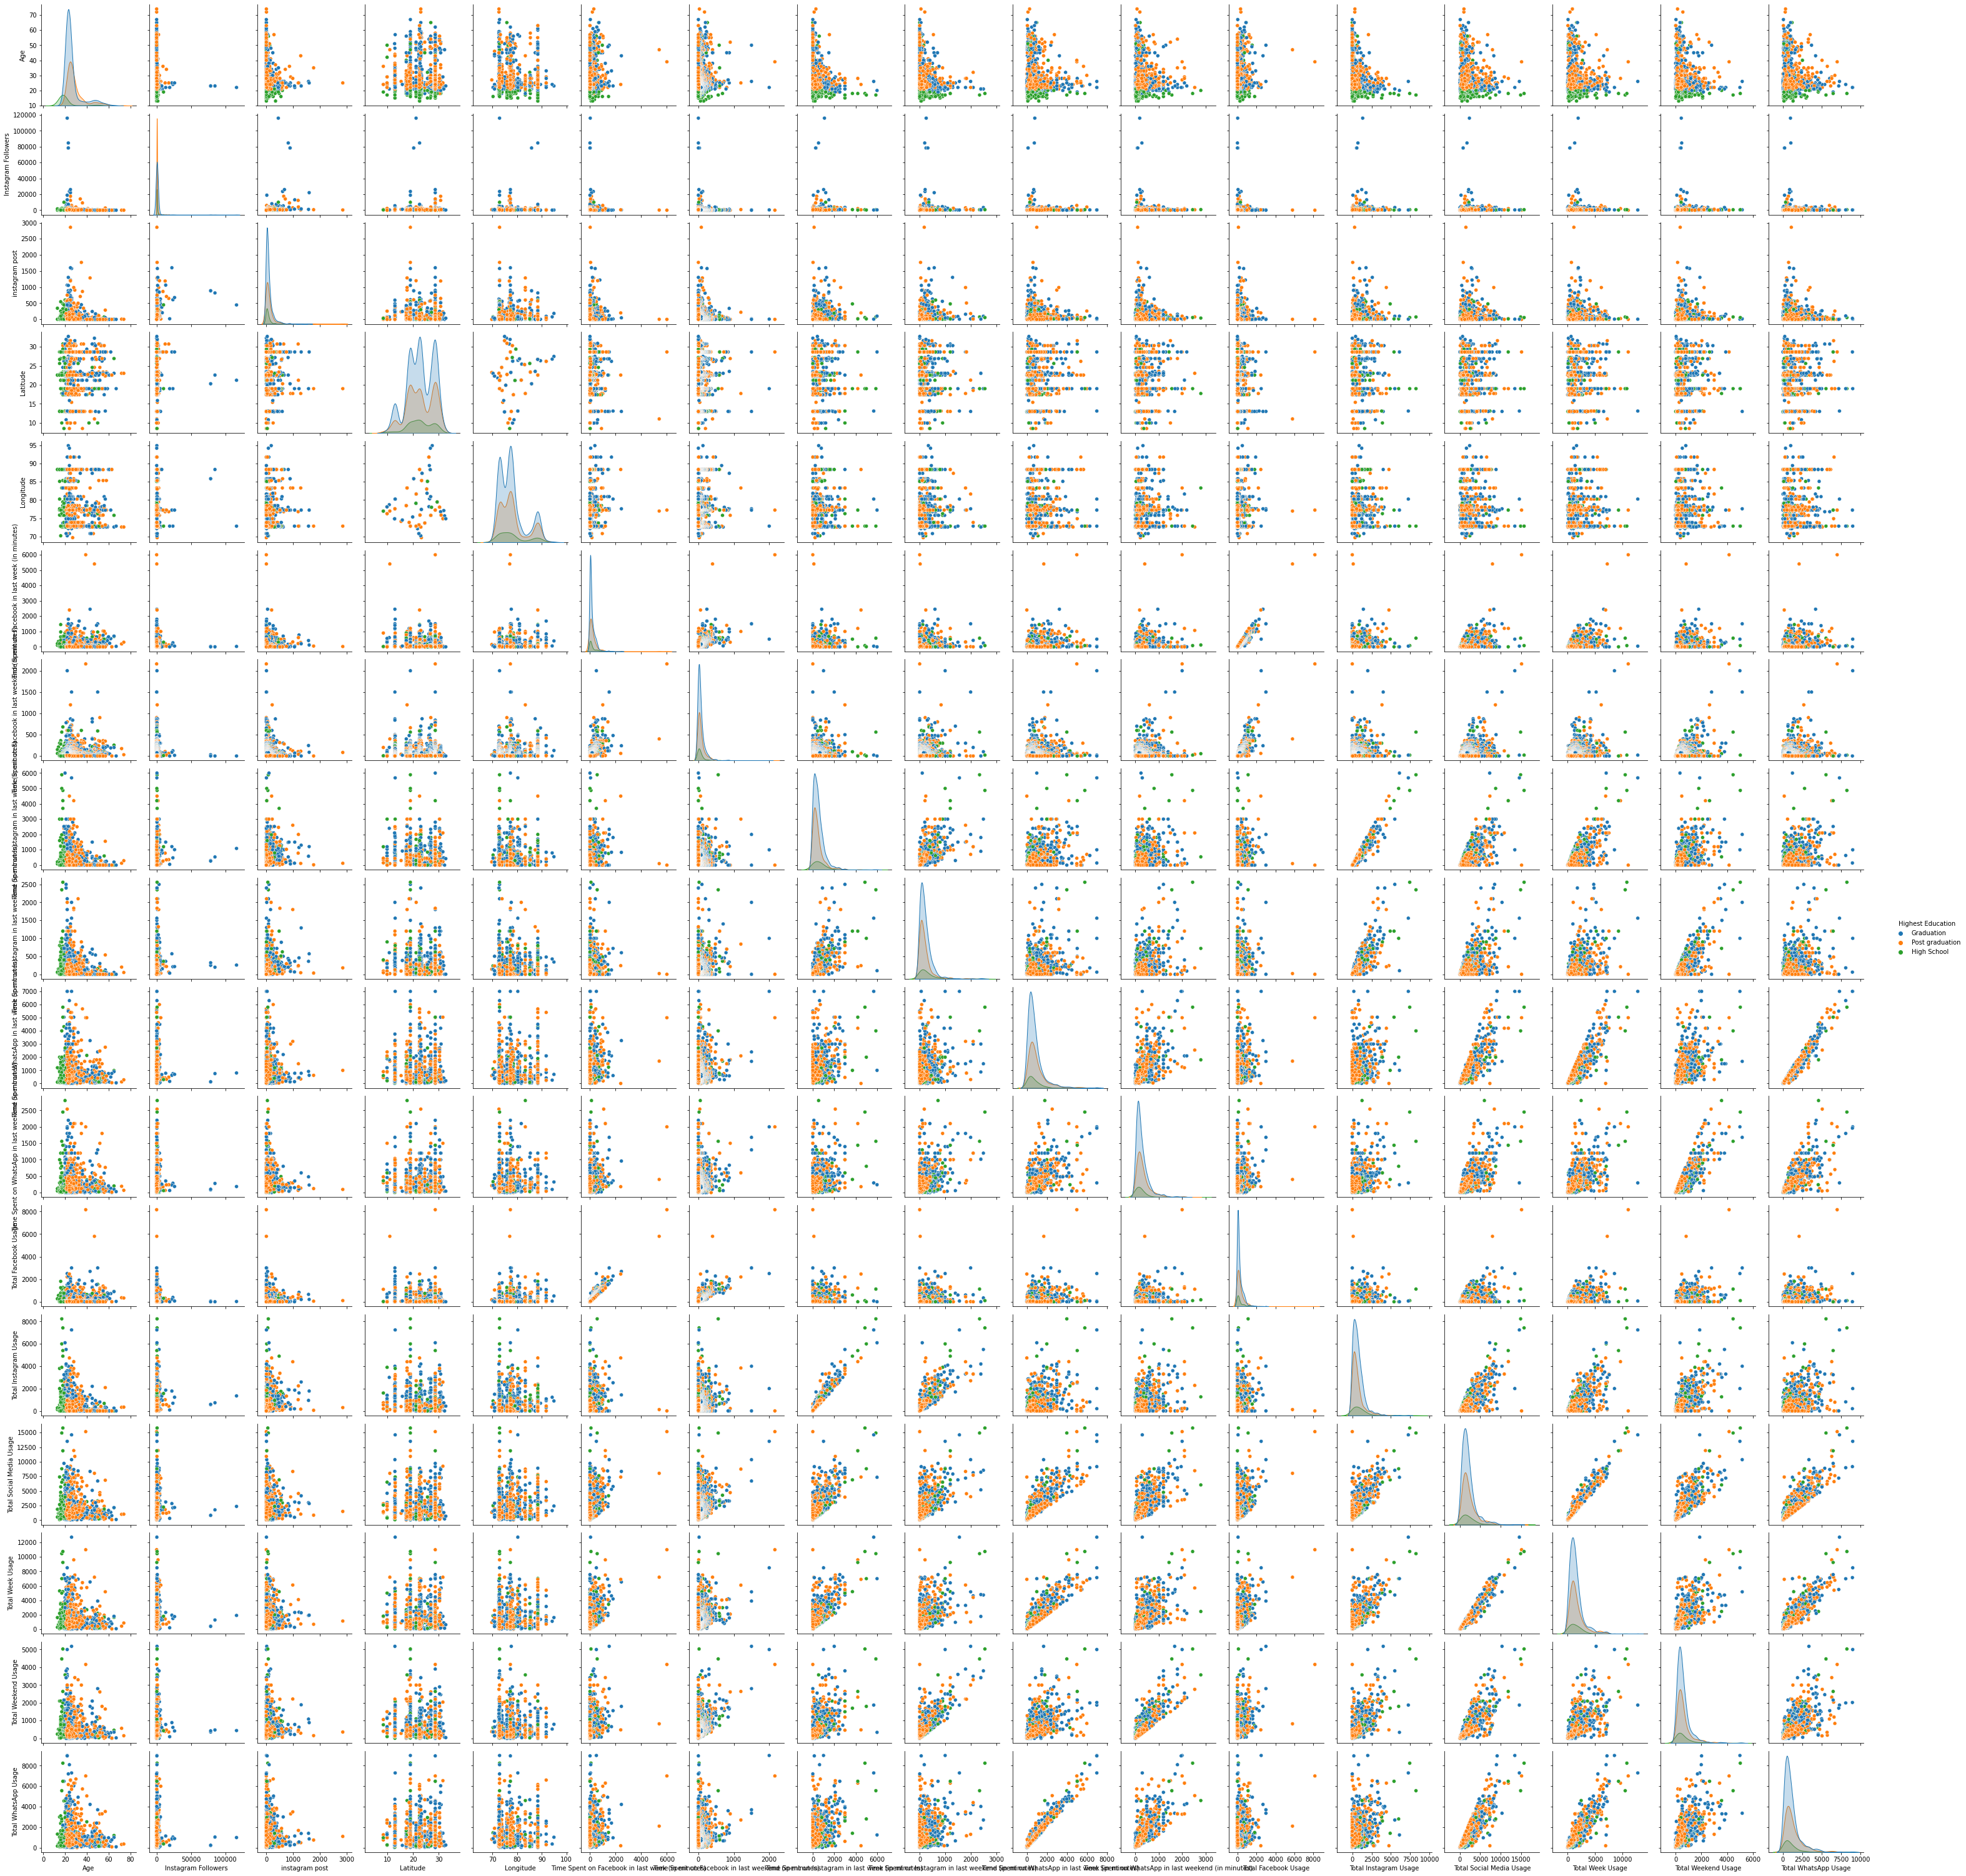

In [22]:
sns.pairplot(data,hue='Highest Education',diag_kind='kde',kind="scatter")
plt.show()

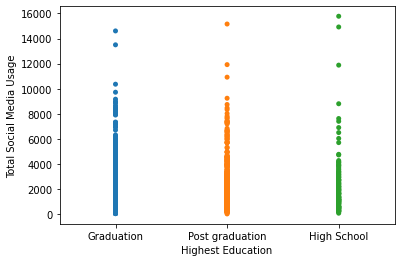

In [23]:
sns.stripplot(x = 'Highest Education', y ='Total Social Media Usage',data=data,jitter=False)
plt.show()

C:\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


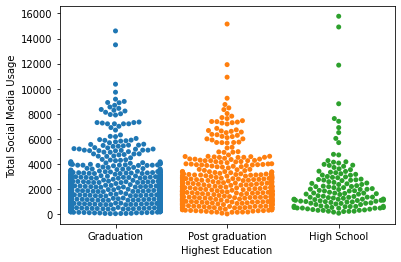

In [24]:
sns.swarmplot(x = 'Highest Education', y ='Total Social Media Usage',data=data,dodge=False)
plt.show()

In [25]:
data.groupby('Highest Education')['Total Social Media Usage'].mean()

Highest Education
Graduation         2025.457956
High School        2296.233577
Post graduation    2241.512963
Name: Total Social Media Usage, dtype: float64

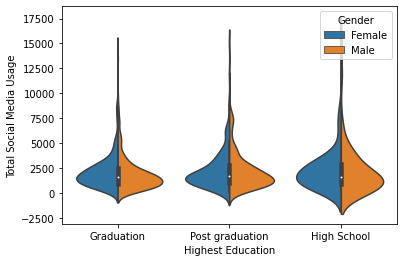

In [26]:
sns.violinplot(x='Highest Education',y='Total Social Media Usage',hue='Gender',dodge= False,split=True,data= data)
plt.show()

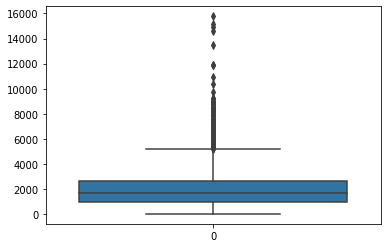

In [27]:
sns.boxplot(data=data['Total Social Media Usage'],)
plt.show()

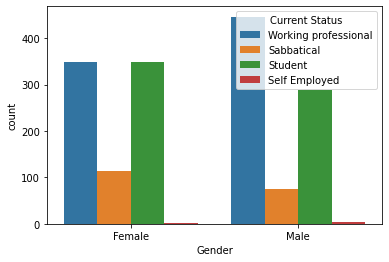

In [28]:
sns.countplot(x ='Gender',hue='Current Status',data=data)
plt.show()

### Conclusion:
1. Females are more active on social media
2. Whatapp is more popular    (whatapp> instagram > facebook)
3. facbook is less popular
4. High school students are more use social network (high_school> Graduation> post graduation)